In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from census import Census
import scipy.stats as st

#from citipy import citipy
from config import api_key

# # Read the mass shootings file and store into Pandas DataFrames
mass_shoot_df = pd.read_csv("Resources/mass_shootings_complete.csv")
mass_shoot_df = mass_shoot_df.dropna()
mass_shoot_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4
...,...,...,...,...,...,...,...
3763,2201641,1-Jan-22,Wisconsin,Kenosha,1708 52nd St,1,3
3764,2202001,1-Jan-22,Illinois,Peoria,2000 block of SW Adams St,2,2
3765,2201876,1-Jan-22,South Carolina,Dillon,3261 Hwy 9,0,5
3766,2201848,1-Jan-22,Indiana,South Bend,1500 block of S Miami St,0,4


# **Mass Shootings Summary for the last 8 years (Julie)** 

Have the rates of mass shootings increased within the last 8 years?


In [2]:
# Count total incidents per State
state_count = mass_shoot_df["State"].value_counts()
state_count

Illinois                391
California              327
Texas                   257
Florida                 220
Pennsylvania            181
New York                176
Louisiana               169
Ohio                    147
Georgia                 140
Maryland                119
Michigan                117
Missouri                117
Tennessee               113
North Carolina          112
Alabama                 102
South Carolina           95
Virginia                 89
New Jersey               87
Indiana                  77
Mississippi              72
District of Columbia     59
Colorado                 58
Wisconsin                51
Minnesota                48
Arizona                  46
Kentucky                 44
Arkansas                 42
Washington               42
Massachusetts            30
Oklahoma                 28
Nevada                   27
Connecticut              27
Kansas                   22
New Mexico               22
Oregon                   20
Delaware            

In [3]:
state_count_df = pd.DataFrame(state_count)
state_count_df

,State
Illinois,391
California,327
Texas,257
Florida,220
Pennsylvania,181
New York,176
Louisiana,169
Ohio,147
Georgia,140
Maryland,119


<BarContainer object of 49 artists>

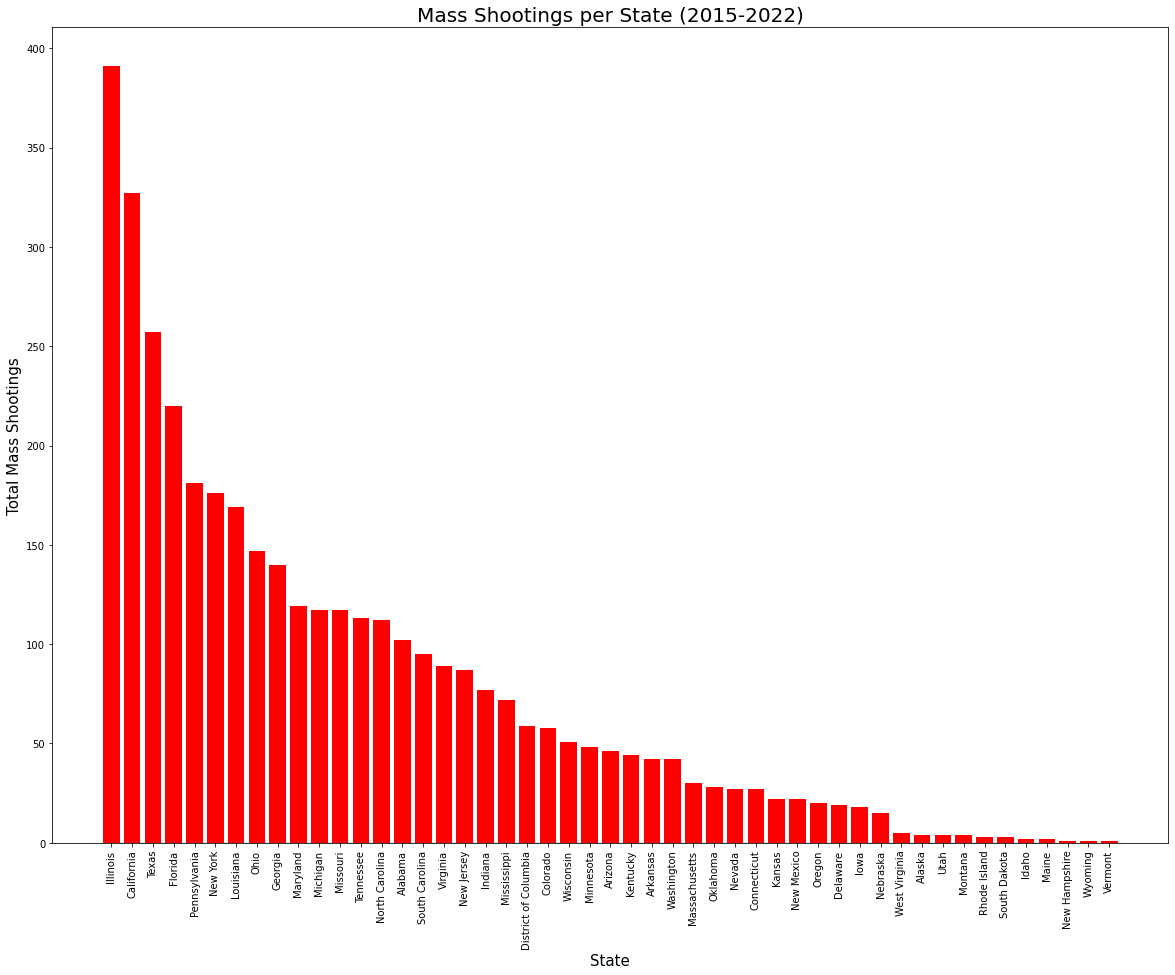

In [4]:
# Create a bar chart with mass shootings per state
fig, ax = plt.subplots(figsize=(20,15))

x_axis = state_count.index.values
y_axis = state_count.values
per_state_chart = ax.bar(x_axis, y_axis, color='red', align="center", width = 0.8)
plt.xlabel("State", fontsize = 15)
plt.ylabel("Total Mass Shootings", fontsize = 15)
plt.title("Mass Shootings per State (2015-2022)", fontsize = 20)
plt.xticks(rotation="vertical")

#plt.savefig("output_data/Fig1.png")

per_state_chart

In [5]:
# Calculate how many incidents happened in different cities
mass_shoot_by_city = mass_shoot_df["City Or County"].value_counts()
mass_shoot_by_city_df = pd.DataFrame(mass_shoot_by_city)
mass_shoot_by_city_df

,City Or County
Chicago,289
Philadelphia,128
Baltimore,82
Houston,72
New Orleans,61
...,...
Ecorse,1
Orangeburg,1
Koshkonong,1
Costa Mesa,1


In [ ]:
# Create a bar chart visualizing total incidents per city 
#fig, ax = plt.subplots(figsize=(20,15))

#x_axis = mass_shoot_by_city.index.values
#y_axis = mass_shoot_by_city.values
#per_state_chart = ax.bar(x_axis, y_axis, color='green', align="center", width = 0.8)
#plt.xlabel("City or County", fontsize = 15)
#plt.ylabel("Total Mass Shootings", fontsize = 15)
#plt.title("Mass Shootings per State (2015-2022)", fontsize = 20)
#plt.xticks(rotation="vertical")

In [6]:
# Creating a separate column to store Year
mass_shoot_df["Year"] = pd.to_datetime(mass_shoot_df["Incident Date"]).dt.year
mass_shoot_df.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Year
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4,2015
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4,2015
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4,2015
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4,2015


In [ ]:
# Calculate the total number of mass shootings each year 
mass_shootings_2015 = mass_shoot_df[mass_shoot_df["Year"] == 2015]
mass_shootings_2016 = mass_shoot_df[mass_shoot_df["Year"] == 2016]
mass_shootings_2017 = mass_shoot_df[mass_shoot_df["Year"] == 2017]
mass_shootings_2018 = mass_shoot_df[mass_shoot_df["Year"] == 2018]
mass_shootings_2019 = mass_shoot_df[mass_shoot_df["Year"] == 2019]
mass_shootings_2020 = mass_shoot_df[mass_shoot_df["Year"] == 2020]
mass_shootings_2021 = mass_shoot_df[mass_shoot_df["Year"] == 2021]
mass_shootings_2022 = mass_shoot_df[mass_shoot_df["Year"] == 2022]

total_2015 = mass_shootings_2015["Year"].value_counts()
total_2016 = mass_shootings_2016["Year"].value_counts()
print(total_2015)
print(total_2016)

In [7]:
# Create a dataframe to store number of incidents per year
mass_shoot_by_year = mass_shoot_df["Year"].value_counts()
mass_shoot_by_year_df = pd.DataFrame(mass_shoot_by_year)
mass_shoot_by_year_df

,Year
2021,688
2022,641
2020,609
2019,417
2016,383
2017,348
2015,335
2018,335


**Bar chart: Mass Shootings per year**

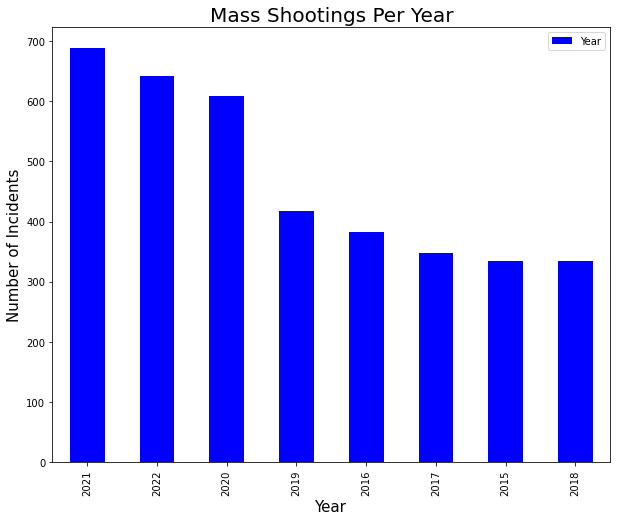

In [8]:
# Create a bar chart to display Total Mass Shootings per year
bar_chart_per_year = mass_shoot_by_year_df.plot(kind="bar", color="blue", figsize =(10,8))
bar_chart_per_year.set_title("Mass Shootings Per Year", fontsize = 20)
bar_chart_per_year.set_xlabel("Year", fontsize = 15)
bar_chart_per_year.set_ylabel("Number of Incidents", fontsize = 15)
bar_chart_per_year

**Scatter Plot/Line Chart: mass shootings per season** 

In [ ]:
# Calculate the total number of mass shootings per season/month

In [ ]:
# Calculate the total number of mass shootings per state (each year)

In [ ]:
# Visualize data on red/blue state vs. total number of mass shootings (API call? hvplot.pandas?)

In [ ]:
# Calculate the total number of mass shootings per state each year (per one million people)

**Map: Total Number of Mass Shootings per State (points of different sizes)**

# **Census Data vs. Mass Shootings Data (Nancy)**

Does local poverty rate/lower median family income contribute to greater prevelance of mass shootings in the US? 

In [15]:
# API Call to get Cencus Data (population) by State 

c = Census(
    api_key,
    year = 2020
)

census_data = c.acs5.get(
    ("NAME",
     "B01003_001E", 
     "B19013_001E",
     "B19301_001E",
     "B17001_002E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B01003_001E,B19013_001E,B19301_001E,B17001_002E,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


In [16]:
# Rename columns
census_data_complete = census_pd.rename(columns={
    "NAME": "State",
    "B01003_001E": "Population",
    "B19013_001E": "Household Income",
    "B19301_001E": "Per Capita Income",
    "B17001_002E": "Poverty Count"
})
census_data_complete.head()

,State,Population,Household Income,Per Capita Income,Poverty Count,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


In [ ]:
# Convert the poverty rate data into a Pandas DataFrame

In [ ]:
# Sort the ______ by `______` in ascending order.

**Scatter Plot (hvplot.pandas): City vs. Mass shootings** 

**Pie Chart: Total Mass shootings vs. Poverty rate/Income**

# Mass Shooting vs. Gun Violence (%) (Isidore)

What percentage of gun violence is related/from Mass Shootings? 

# **Guns Laws vs. Mass Shootings (Leah)**

Do strict gun laws prevent mass shooting?

In [7]:
# Extract ranking for stricter gun laws
mass_shoot_df.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4


In [8]:
data_by_state_sum = pd.DataFrame(mass_shoot_df.groupby(mass_shoot_df["State"]).sum())
data_by_state_sum.head()

,Incident ID,# Killed,# Injured
State,,,
Alabama,154407565,104,400
Alaska,7378729,6,12
Arizona,69422977,77,181
Arkansas,63830055,37,208
California,458296864,382,1294


In [9]:
data_by_state_count = pd.DataFrame(mass_shoot_df.groupby(mass_shoot_df["State"]).count())
data_by_state_count.head()

,Incident ID,Incident Date,City Or County,Address,# Killed,# Injured
State,,,,,,
Alabama,102,102,102,102,102,102
Alaska,4,4,4,4,4,4
Arizona,46,46,46,46,46,46
Arkansas,42,42,42,42,42,42
California,327,327,327,327,327,327


In [10]:
data_by_state = pd.merge(data_by_state_count, data_by_state_sum, on="State")
data_by_state_df = data_by_state[["Incident ID_x", "# Killed_y", "# Injured_y"]]
state_data = data_by_state_df.rename(columns={"Incident ID_x": "Incident Count", "# Killed_y": "Total Killed", "# Injured_y": "Total Injured"})
state_data.head()

,Incident Count,Total Killed,Total Injured
State,,,
Alabama,102,104,400
Alaska,4,6,12
Arizona,46,77,181
Arkansas,42,37,208
California,327,382,1294


In [44]:
gun_laws = pd.read_csv("Resources/gun_law_data.csv")
gun_laws.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning
0,California,86.5,1,1,1,1,1,1,blue
1,New York,81.5,2,1,0,1,1,1,blue
2,Hawaii,79.5,3,1,1,1,1,1,blue
3,New Jersey,79.0,4,1,1,1,1,1,blue
4,Connecticut,78.5,5,1,0,1,1,1,blue


In [49]:
combo_df = pd.merge(gun_laws, state_data, on="State", how="outer")
combo_filled = combo_df.fillna(0)
combo_filled.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0


In [68]:
data_by_state_df = pd.merge(combo_filled, census_data_complete, on="State", how="outer")

data_by_state_df.drop(labels=[50, 51], axis=0, inplace=True)

data_by_state_df.head()
                       

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,state
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0,39346023.0,78672.0,38576.0,4853434.0,06
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0,19514849.0,71117.0,40898.0,2581048.0,36
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0,1420074.0,83173.0,37013.0,127971.0,15
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0,8885418.0,85245.0,44153.0,842704.0,34
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0,3570549.0,79855.0,45668.0,339156.0,09


In [71]:
data_by_state_df = state_per_capita

incident_per_capita = round((state_per_capita["Incident Count"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Incidents per Million"] = incident_per_capita

deaths_per_capita = round((state_per_capita["Total Killed"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Deaths per Million"] = deaths_per_capita

injured_per_capita = round((state_per_capita["Total Injured"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Injured per Million"] = injured_per_capita
state_per_capita.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,state,Incidents per Million,Deaths per Million,Injured per Million
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0,39346023.0,78672.0,38576.0,4853434.0,06,8.31,9.71,32.89
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0,19514849.0,71117.0,40898.0,2581048.0,36,9.02,5.02,39.41
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0,1420074.0,83173.0,37013.0,127971.0,15,0.00,0.00,0.00
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0,8885418.0,85245.0,44153.0,842704.0,34,9.79,6.64,41.75
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0,3570549.0,79855.0,45668.0,339156.0,09,7.56,3.92,33.33


In [52]:
leaning = data_by_state_df.groupby(data_by_state_df["Political Leaning"]).sum()
leaning_df = pd.DataFrame(leaning)

leaning_df

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Political Leaning,,,,,,,,,,,,,,,,,
blue,1097.0,158.0,16.0,6.0,17.0,9.0,14.0,1459.0,1330.0,5978.0,134593803.0,1259757.0,666309.0,15228869.0,163.67,154.88,652.85
purple,231.0,226.0,1.0,0.0,2.0,0.0,0.0,757.0,886.0,3519.0,73079332.0,561483.0,307640.0,9237536.0,73.36,102.59,435.22
red,278.0,891.0,0.0,0.0,4.0,0.0,0.0,1481.0,1739.0,5983.0,118194199.0,1405222.0,750343.0,16340530.0,253.51,297.96,1001.99


In [53]:
leaning_count_per_capita = round((leaning_df["Incident Count"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Incidents per Million"] = leaning_count_per_capita
leaning_deaths_per_capita = round((leaning_df["Total Killed"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Deaths per Million"] = leaning_deaths_per_capita
leaning_injured_per_capita = round((leaning_df["Total Injured"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Injured per Million"] = leaning_injured_per_capita
leaning_df

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Political Leaning,,,,,,,,,,,,,,,,,
blue,1097.0,158.0,16.0,6.0,17.0,9.0,14.0,1459.0,1330.0,5978.0,134593803.0,1259757.0,666309.0,15228869.0,10.84,9.88,44.42
purple,231.0,226.0,1.0,0.0,2.0,0.0,0.0,757.0,886.0,3519.0,73079332.0,561483.0,307640.0,9237536.0,10.36,12.12,48.15
red,278.0,891.0,0.0,0.0,4.0,0.0,0.0,1481.0,1739.0,5983.0,118194199.0,1405222.0,750343.0,16340530.0,12.53,14.71,50.62


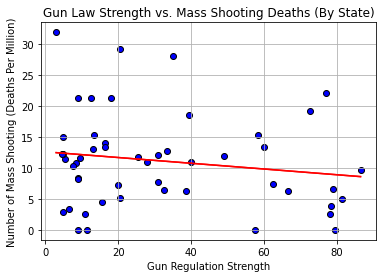

In [129]:
score_x = state_per_capita["ETR Composite Score"]
deaths_y = state_per_capita["Deaths per Million"]
fig1 = plt.scatter(score_x, deaths_y, facecolors="blue", edgecolors="black")

plt.title("Gun Law Strength vs. Mass Shooting Deaths (By State)")
plt.xlabel("Gun Regulation Strength")
plt.ylabel("Number of Mass Shooting (Deaths Per Million)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(score_x, deaths_y)
regress_values = score_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (score_x, regress_values, "r-")
plt.plot(score_x, intercept + slope*(score_x), 'r', label='fitted line')

#plt.savefig("../output_data/fig_laws1.png")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

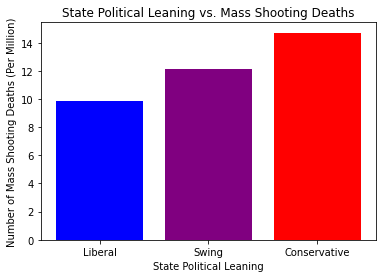

In [127]:
politics_x = ["Liberal", "Swing", "Conservative"]
deaths_per_million_y = leaning_df["Deaths per Million"]
plt.bar(politics_x, deaths_per_million_y, color=("blue", "purple", "red"), align="center")

plt.title("State Political Leaning vs. Mass Shooting Deaths")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Deaths (Per Million)")

#plt.savefig("../output_data/fig_laws2.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

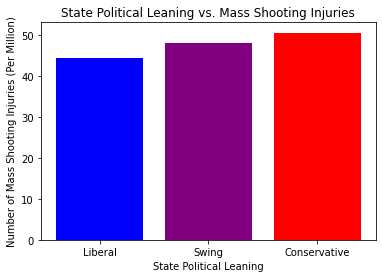

In [126]:
politics_x = ["Liberal", "Swing", "Conservative"]
injured_per_million_y = leaning_df["Injured per Million"]
plt.bar(politics_x, injured_per_million_y, color=("blue", "purple", "red"), align="center")

plt.title("State Political Leaning vs. Mass Shooting Injuries")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Injuries (Per Million)")

#plt.savefig("../output_data/fig_laws3.png")
plt.show

In [74]:
background = data_by_state_df.groupby(data_by_state_df["Background Checks"]).sum()
background_incident = round((background["Incident Count"] / background["Population"]) * 1000000, 2)
background["Incidents per Million"] = background_incident
background_deaths = round((background["Total Killed"] / background["Population"]) * 1000000, 2)
background["Deaths per Million"] = background_deaths
background_injured = round((background["Total Injured"] / background["Population"]) * 1000000, 2)
background["Injured per Million"] = background_injured

background

,ETR Composite Score,ETR Rank,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Background Checks,,,,,,,,,,,,,,,,
0.0,512.5,1116.0,0.0,7.0,0.0,0.0,2259.0,2575.0,9161.0,193843416.0,1978044.0,1064235.0,25707556.0,11.65,13.28,47.26
1.0,1093.5,159.0,6.0,16.0,9.0,14.0,1438.0,1380.0,6319.0,132023918.0,1248418.0,660057.0,15099379.0,10.89,10.45,47.86


In [73]:
waiting = data_by_state_df.groupby(data_by_state_df["Waiting Period"]).sum()

waiting_incident = round((waiting["Incident Count"] / waiting["Population"]) * 1000000, 2)
waiting["Incidents per Million"] = waiting_incident
waiting_deaths = round((waiting["Total Killed"] / waiting["Population"]) * 1000000, 2)
waiting["Deaths per Million"] = waiting_deaths
waiting_injured = round((waiting["Total Injured"] / waiting["Population"]) * 1000000, 2)
waiting["Injured per Million"] = waiting_injured
waiting

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Waiting Period,,,,,,,,,,,,,,,,,
0.0,1154.0,1239.0,11.0,0.0,17.0,4.0,8.0,2770.0,3117.0,11679.0,256404233.0,2753576.0,1486388.0,32844818.0,10.80,12.16,45.55
1.0,452.0,36.0,6.0,6.0,6.0,5.0,6.0,927.0,838.0,3801.0,69463101.0,472886.0,237904.0,7962117.0,13.35,12.06,54.72


In [75]:
no_stand = data_by_state_df.groupby(data_by_state_df["No Stand Your Ground"]).sum()

no_stand_incident = round((no_stand["Incident Count"] / no_stand["Population"]) * 1000000, 2)
no_stand["Incidents per Million"] = waiting_incident
no_stand_deaths = round((no_stand["Total Killed"] / no_stand["Population"]) * 1000000, 2)
no_stand["Deaths per Million"] = no_stand_deaths
no_stand_injured = round((no_stand["Total Injured"] / no_stand["Population"]) * 1000000, 2)
no_stand["Injured per Million"] = no_stand_injured
no_stand

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
No Stand Your Ground,,,,,,,,,,,,,,,,
0.0,400.5,930.0,1.0,0.0,0.0,0.0,1981.0,2350.0,8406.0,166754363.0,1608002.0,860076.0,22525223.0,10.80,14.09,50.41
1.0,1205.5,345.0,16.0,6.0,9.0,14.0,1716.0,1605.0,7074.0,159112971.0,1618460.0,864216.0,18281712.0,13.35,10.09,44.46


In [77]:
weapons_ban = data_by_state_df.groupby(data_by_state_df["Assualt Weapons Ban"]).sum()

weapons_ban_incident = round((weapons_ban["Incident Count"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Incidents per Million"] = weapons_ban_incident
weapons_ban_deaths = round((weapons_ban["Total Killed"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Deaths per Million"] = weapons_ban_deaths
weapons_ban_injured = round((weapons_ban["Total Injured"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Injured per Million"] = weapons_ban_injured
weapons_ban

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Assualt Weapons Ban,,,,,,,,,,,,,,,,
0.0,913.5,1228.0,8.0,1.0,14.0,5.0,2521.0,2974.0,10612.0,226535951.0,2519414.0,1355197.0,29281304.0,11.13,13.13,46.84
1.0,692.5,47.0,9.0,5.0,9.0,9.0,1176.0,981.0,4868.0,99331383.0,707048.0,369095.0,11525631.0,11.84,9.88,49.01


In [78]:
high_cap_ban = data_by_state_df.groupby(data_by_state_df["High-Capacity Mag. Ban"]).sum()

high_cap_ban_incident = round((high_cap_ban["Incident Count"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Incidents per Million"] = high_cap_ban_incident
high_cap_ban_deaths = round((high_cap_ban["Total Killed"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Deaths per Million"] = high_cap_ban_deaths
high_cap_ban_injured = round((high_cap_ban["Total Injured"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Injured per Million"] = high_cap_ban_injured
high_cap_ban

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
High-Capacity Mag. Ban,,,,,,,,,,,,,,,,
0.0,636.0,1164.0,3.0,0.0,9.0,0.0,2397.0,2801.0,10135.0,207480076.0,2167728.0,1166064.0,27296985.0,11.55,13.50,48.85
1.0,970.0,111.0,14.0,6.0,14.0,9.0,1300.0,1154.0,5345.0,118387258.0,1058734.0,558228.0,13509950.0,10.98,9.75,45.15


Text(0, 0.5, 'Number of Mass Shooting Deaths (Per Million)')

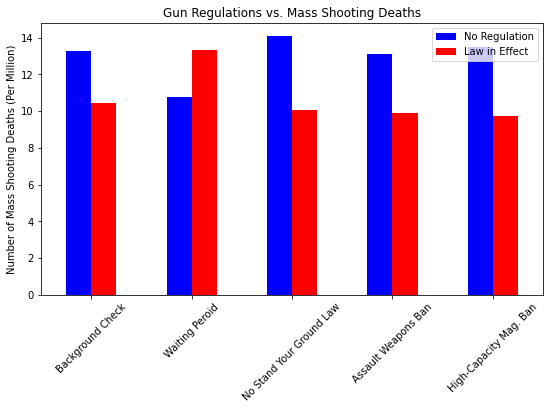

In [122]:
df = pd.DataFrame({"No Regulation":[background.iloc[0,14], waiting.iloc[0,14], no_stand.iloc[0,14], weapons_ban.iloc[0,14], high_cap_ban.iloc[0,14]],
                  "Law in Effect": [background.iloc[1,14], waiting.iloc[1,14], no_stand.iloc[1,14], weapons_ban.iloc[1,14], high_cap_ban.iloc[1,14]]},
                 index = ["Background Check", "Waiting Peroid", "No Stand Your Ground Law", "Assault Weapons Ban", "High-Capacity Mag. Ban"])

df.plot(kind="bar", color=("red", "blue"), align="center", figsize=(9,5))
plt.xticks(rotation=45)
plt.title("Gun Regulations vs. Mass Shooting Deaths")
plt.ylabel("Number of Mass Shooting Deaths (Per Million)")
#plt.savefig("../output_data/fig_laws4.png")
